In [1]:
import pandas as pd# ---------------------- LINEAR REGRESSION (Simple Explanation) ----------------------
# Linear Regression is a supervised learning algorithm.
# It learns a straight-line relationship between input features (X) and a continuous output (y).
# It tries to find the best-fit line that minimizes the difference between predictions and actual values.

# ---------------------- 1. IMPORT REQUIRED LIBRARIES ----------------------

import pandas as pd                                # For loading and handling tabular data
import numpy as np                                 # For numerical operations

from sklearn.model_selection import train_test_split       # To split data into train/test sets
from sklearn.linear_model import LinearRegression          # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score   # Metrics to evaluate model performance

import matplotlib.pyplot as plt                    # For plotting and visualizing results

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [2]:
# ---------------------- 2. LOAD THE DATASET ----------------------
# Replacing local path with a public dataset reference:
# (Search on Kaggle: "Manhattan house prices" or "NYC housing dataset")
# Example Kaggle link: https://www.kaggle.com/datasets/fvelychko/nyc-real-estate-housing-data

df = pd.read_csv("manhattan.csv")   # Load the dataset
df.head()                           # Display first 5 rows


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [3]:
# ---------------------- 3. SELECT & CLEAN FEATURES ----------------------
# We focus on two columns:
# - size_sqft : apartment size
# - rent      : rental price (our target)
#
# dropna() removes rows with missing values.
# sample() picks 500 random rows for faster training and cleaner visuals.

data = df[["size_sqft", "rent"]].copy()              # Keep only required columns
data = data.dropna(subset=["size_sqft", "rent"])     # Remove missing values
data = data.sample(n=500, random_state=42)           # Take a sample for simplicity

data.describe()                                      # Summary statistics of the data


,size_sqft,rent
count,500.000000,500.000000
mean,940.530000,5192.730000
std,463.935782,3129.679621
min,250.000000,1550.000000
25%,633.750000,3200.000000
50%,800.000000,4200.000000
75%,1100.000000,5995.000000
max,3500.000000,20000.000000


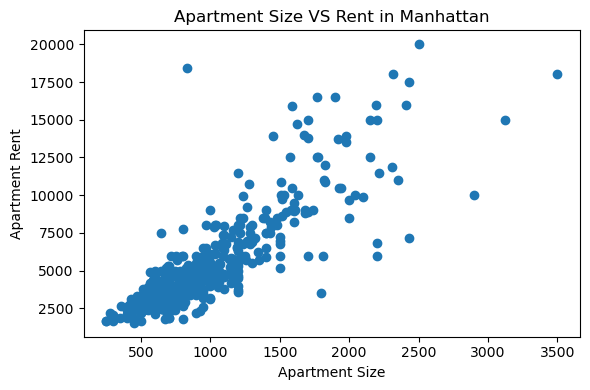

In [4]:
# ---------------------- 4. VISUALIZE RELATION BETWEEN SIZE AND RENT ----------------------
# Scatter plot helps us see the linear trend: bigger apartments generally cost more.

plt.figure(figsize=(6,4))
plt.scatter(data["size_sqft"], data["rent"])       # Plot size vs rent
plt.xlabel("Apartment Size")
plt.ylabel("Apartment Rent")
plt.title("Apartment Size VS Rent in Manhattan")
plt.tight_layout()
plt.show()


In [5]:
# ---------------------- 5. SPLIT FEATURES AND TARGET ----------------------
# X = apartment size (input)
# y = rent price (output)
# train_test_split divides data so the model learns on training data
# and is evaluated on unseen test data.

X = data[["size_sqft"]]     # Feature
y = data[["rent"]]          # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,          # 20% of the data used for testing
    random_state=42         # Reproducible split
)

len(X_train), len(X_test)   # Show train/test sizes


(400, 100)

In [6]:
# ---------------------- 6. TRAIN LINEAR REGRESSION MODEL ----------------------
# The model learns the best-fit line:
# rent = (slope * size_sqft) + intercept
#
# slope (w)     → how much rent increases for each additional sqft
# intercept (b) → predicted rent when size_sqft = 0 (baseline)

model = LinearRegression()          # Create model
model.fit(X_train, y_train)         # Train on training data

slope = float(model.coef_[0])       # Extract slope (convert from array to float)
intercept = float(model.intercept_) # Extract intercept

print(f"Slope (w): {slope:.2f} $ per sqft")
print(f"Intercept (b): {intercept:.2f} $")

print(f"\nEquation of the line:  rent ≈ {slope:.2f} * size_sqft + {intercept:.2f}")


Slope (w): 5.77 $ per sqft
Intercept (b): -177.64 $

Equation of the line:  rent ≈ 5.77 * size_sqft + -177.64


C:\Users\savij\AppData\Local\Temp\ipykernel_30988\264362311.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
C:\Users\savij\AppData\Local\Temp\ipykernel_30988\264362311.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


In [7]:
# ---------------------- 7. EVALUATE MODEL PERFORMANCE ----------------------
# MSE → Measures average squared error (lower is better)
# R²  → Explains how much variance in rent is explained by size (closer to 1 is better)

y_pred = model.predict(X_test)           # Predict rent for test data

mse = mean_squared_error(y_test, y_pred) # Calculate MSE
r2 = r2_score(y_test, y_pred)            # Calculate R² score

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error (MSE): 2931336.10
R² Score: 0.635


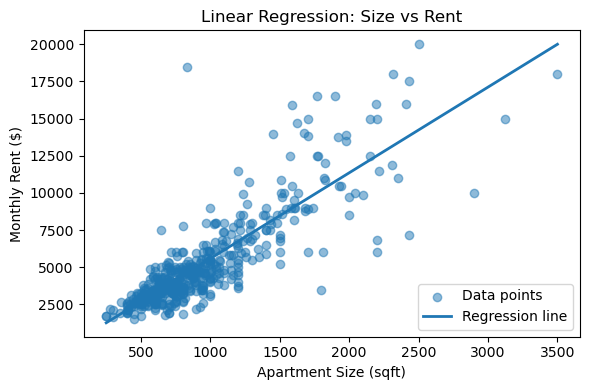

In [8]:
# ---------------------- 8. VISUALIZE REGRESSION LINE ----------------------
# Sorting by size_sqft helps create a smooth line instead of a zig-zag shape.
# The regression line shows the predicted rent trend across apartment sizes.

sorted_data = data.sort_values("size_sqft")   # Sort for a cleaner line
X_line = sorted_data[["size_sqft"]]
y_line_pred = model.predict(X_line)           # Predict rent for sorted sizes

plt.figure(figsize=(6, 4))
plt.scatter(data["size_sqft"], data["rent"], label="Data points", alpha=0.5)
plt.plot(X_line["size_sqft"], y_line_pred, label="Regression line", linewidth=2)
plt.xlabel("Apartment Size (sqft)")
plt.ylabel("Monthly Rent ($)")
plt.title("Linear Regression: Size vs Rent")
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
# ---------------------- 9. INFERENCE ON NEW APARTMENT SIZES ----------------------
# Predict rent for new sizes not seen during training.

new_sizes = pd.DataFrame({
    "size_sqft": [400, 600, 800, 1000]    # Example apartment sizes
})

predicted_rents = model.predict(new_sizes)   # Predict rent for each size

for size, rent_pred in zip(new_sizes["size_sqft"], predicted_rents):
    print(f"Predicted rent for {size} sqft: ${float(rent_pred):.0f} per month")


Predicted rent for 400 sqft: $2129 per month
Predicted rent for 600 sqft: $3282 per month
Predicted rent for 800 sqft: $4435 per month
Predicted rent for 1000 sqft: $5588 per month


C:\Users\savij\AppData\Local\Temp\ipykernel_30988\79828506.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted rent for {size} sqft: ${float(rent_pred):.0f} per month")
